In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


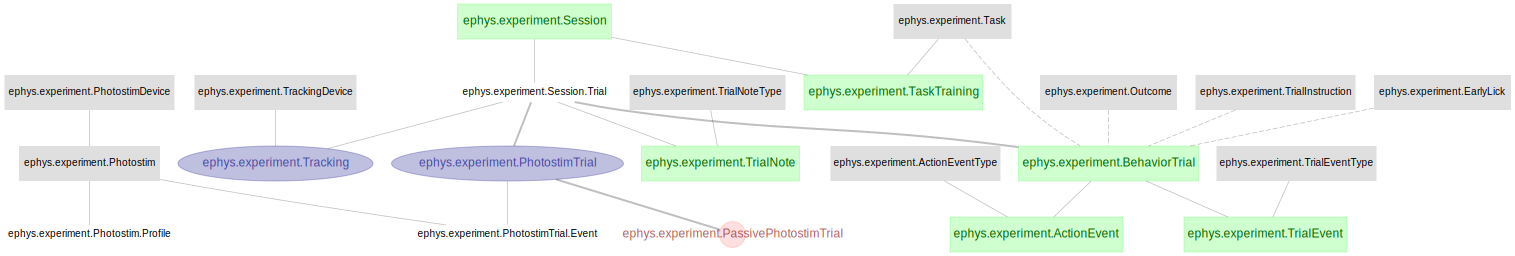

In [3]:
dj.ERD(ephys.experiment)

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

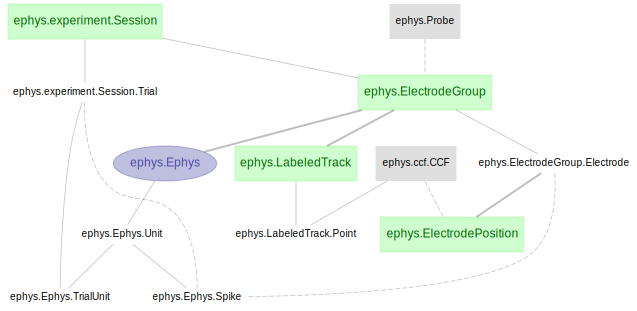

In [5]:
dj.ERD(ephys)-1

In [6]:
behaviorT=ephys.experiment.BehaviorTrial()

In [7]:
contraH=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [8]:
ipsiH=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [9]:
contraE=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [10]:
ipsiE=(behaviorT & 'animal = 123456' & 'session =26' & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [11]:
ephys1=ephys.Ephys()

In [12]:
spike=ephys1.Spike()

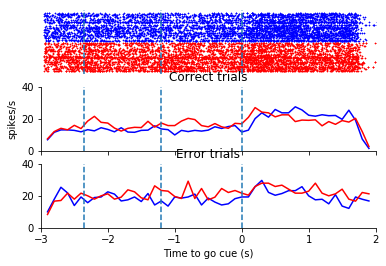

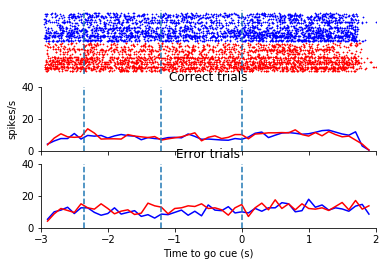

In [85]:
for x in range(108,110):
    unit1=(spike & {'unit': x}).fetch('spike_time','trial')
    binSize=0.1;
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],contraH)]+500,'b.',markersize=1)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],ipsiH)],'r.',markersize=1)
    ax.set_axis_off()
    ax.set_xlim([-3, 2])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    ax = plt.subplot(312)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(contraH)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(ipsiH)/binSize, 'r')
    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 40])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Correct trials')
    ax = plt.subplot(313)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(contraE)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(ipsiE)/binSize, 'r')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 40])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')

In [14]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(1,400):
    unit1=(spike & {'unit': x}).fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>3:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

In [15]:
Clist=np.empty(len(selectC[1]))
for i in range(0,len(selectC[1])):
    Clist[i]=np.where(selectC[i]==1)[0]
Clist=np.asarray(np.argsort(Clist), dtype='int')

In [16]:
Ilist=np.empty(len(selectI[1]))
for i in range(0,len(selectI[1])):
    Ilist[i]=np.where(selectI[i]==-1)[0]
Ilist=np.asarray(np.argsort(Ilist), dtype='int')

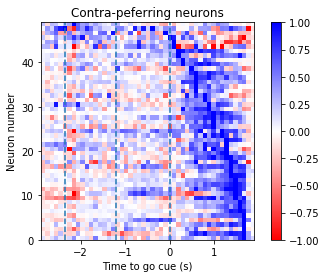

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectC[:][Clist],vmin=-1, vmax=1, extent=[psthC[1][1],psthC[1][-1],0, len(selectC[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Contra-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time to go cue (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

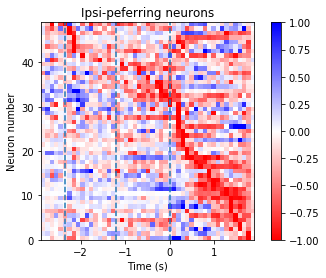

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectI[:][Ilist],vmin=-1, vmax=1, extent=[psthI[1][1],psthI[1][-1],0, len(selectI[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Ipsi-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

In [48]:
sC=np.empty(len(hfNeurons))
sE=np.empty(len(hfNeurons))
for x in range(0,len(hfNeurons)): # choice related activity
    unit1=(spike & {'unit': hfNeurons[x]}).fetch('spike_time','trial') # find high firing neurons
    spkC=np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95
    spkI=np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95
    spkCE=np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95
    spkIE=np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95
    sC[x]=(len(spkC[(spkC<2) & (spkC>0)])/len(contraH)-len(spkI[(spkI<2) & (spkI>0)])/len(ipsiH))/2
    sE[x]=(len(spkCE[(spkCE<2) & (spkCE>0)])/len(contraE)-len(spkIE[(spkIE<2) & (spkIE>0)])/len(ipsiE))/2
    

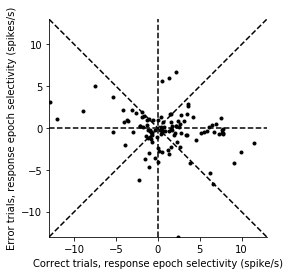

In [78]:
ax=plt.subplot(111)
plt.plot(sC,sE,'k.',[-13, 13], [-13, 13],'k--',[-13, 13], [13, -13],'k--')
plt.xlabel('Correct trials, response epoch selectivity (spike/s)')
plt.ylabel('Error trials, response epoch selectivity (spikes/s)')
plt.xlim(-13, 13)
plt.ylim(-13, 13)
plt.gca().set_aspect('equal', adjustable='box')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.axvline(0,0,1, ls='--', color='k')
ax.axhline(0,0,1, ls='--', color='k')

In [77]:
np.corrcoef(sC, sE)

array([[ 1.       , -0.2502621],
       [-0.2502621,  1.       ]])

In [79]:
from scipy.stats import linregress
linregress(sC, sE)

LinregressResult(slope=-0.15378458614961138, intercept=-0.1738936481117889, rvalue=-0.25026209950195732, pvalue=0.0083670538387088187, stderr=0.057248104653261127)

In [47]:
# coding direction

2.563087406015036

109.0

In [20]:
# noise correlation